# Modelling Strategie
We looking for solve a classification problem like:\
*What range a goal would belongs ?*
- Target = **class**
- Features = **goal averages for team at home and away (scored / conceded)**
- Model = **Random Forest Classifier**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

### Feature Engineering

In [91]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(path, parse_dates=True, index_col='date_time')
df.head()

,journée,home_team,away_team,1st_home_team_goal,1st_away_team_goal,1st_total_goal,2nd_home_team_goal,2nd_away_team_goal,2nd_total_goal,total_home_team_goal,total_away_team_goal,global
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,AC Ajaccio,Marseille,0,0,0,1,0,1,1,0,1
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,0,0,0,3,1,4
2023-06-03 19:00:00,38,Troyes,Lille,0,0,0,1,1,2,1,1,2
2023-06-03 19:00:00,38,Reims,Montpellier,1,0,1,0,3,3,1,3,4
2023-06-03 19:00:00,38,PSG,Clermont,2,2,4,0,1,1,2,3,5


In [92]:
def avg_per_match():
    """This function will calculate for each team
    the average of goal scored and conceded after each journée
    """
    data = df.copy()
    data = data.sort_values(by='journée', ascending=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_home.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
    return data

In [93]:
data = avg_per_match()
data.tail(10)

,journée,home_team,away_team,1st_home_team_goal,1st_away_team_goal,1st_total_goal,2nd_home_team_goal,2nd_away_team_goal,2nd_total_goal,total_home_team_goal,total_away_team_goal,global,ht_scored_avg,ht_conceded_avg,at_scored_avg,at_conceded_avg
date_time,,,,,,,,,,,,,,,,
2023-06-03 19:00:00,38,Monaco,Toulouse,0,0,0,1,2,3,1,2,3,2.000000,1.722222,1.222222,1.611111
2023-06-03 19:00:00,38,Brest,Rennes,1,2,3,0,0,0,1,2,3,1.277778,1.333333,1.333333,1.333333
2023-06-03 19:00:00,38,Lorient,Strasbourg,2,0,2,0,1,1,2,1,3,1.333333,1.111111,1.388889,1.722222
2023-06-03 19:00:00,38,Nantes,Angers,1,0,1,0,0,0,1,0,1,1.055556,1.444444,0.722222,2.444444
2023-06-03 19:00:00,38,Auxerre,Lens,0,1,1,1,2,3,1,3,4,0.944444,1.388889,1.333333,0.833333
2023-06-03 19:00:00,38,PSG,Clermont,2,2,4,0,1,1,2,3,5,2.388889,1.222222,1.222222,1.055556
2023-06-03 19:00:00,38,Reims,Montpellier,1,0,1,0,3,3,1,3,4,1.500000,1.111111,1.833333,1.777778
2023-06-03 19:00:00,38,Troyes,Lille,0,0,0,1,1,2,1,1,2,1.000000,1.611111,1.333333,1.000000
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,0,0,0,3,1,4,1.166667,0.944444,1.611111,1.388889


### Modelling

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# we started to drop columns which contains missing values
# and non reliable columns
dataset = data[data['journée'] > 2]
dataset = dataset.iloc[:, 11:]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   global           360 non-null    int64  
 1   ht_scored_avg    360 non-null    float64
 2   ht_conceded_avg  360 non-null    float64
 3   at_scored_avg    360 non-null    float64
 4   at_conceded_avg  360 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.9 KB


In [104]:
labels_name = ['under 2,5', 'over 2,5']
dataset['class'] = pd.cut(x=dataset['global'], bins=[min(dataset['global']), 2, max(dataset['global'])],
              labels=labels_name, include_lowest=True)

In [105]:
encod = {
    'under 2,5': 0,
    'over 2,5': 1,
}
dataset['class'] = dataset['class'].map(encod)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   global           360 non-null    int64   
 1   ht_scored_avg    360 non-null    float64 
 2   ht_conceded_avg  360 non-null    float64 
 3   at_scored_avg    360 non-null    float64 
 4   at_conceded_avg  360 non-null    float64 
 5   class            360 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 17.3 KB


In [107]:
y = dataset['class']
X = dataset.drop(['global', 'class'], axis=1)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
parameter = [{'n_estimators': range(1, 30),
             'max_depth':range(1, 30)}]
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=parameter, 
                    scoring='accuracy', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 30),
                          'n_estimators': range(1, 30)}],
             scoring='accuracy')

In [114]:
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestClassifier(max_depth=13, n_estimators=8, random_state=0)
0.5913725490196079


In [115]:
model = grid.best_estimator_
print(f"score {model.__class__.__name__}: {model.score(x_test, y_test)}")
print(confusion_matrix(y_test, model.predict(x_test)))

score RandomForestClassifier: 0.5648148148148148
[[31 17]
 [30 30]]


In [116]:
N, train_score, val_score = learning_curve(
    model, x_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10), cv=5
)

[ 20  40  60  80 100 120 140 160 180 201]


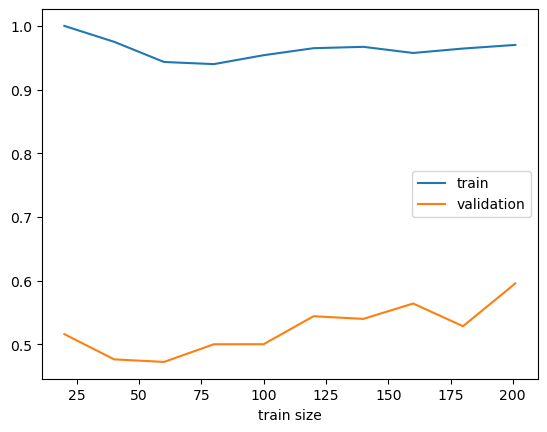

In [117]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train size')
plt.legend()